In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline

#### Approach 1: Plain mathematical approach of calculating slope and intercept

Mathematical formula to calculate slope and intercept from bivariant data:

$$
slope = \frac {n(\sum xy) - (\sum x)(\sum y)} {n(\sum x^2) - (\sum x)^2}
$$

$$
intercept = \frac {\sum y - slope\sum x} {n}
$$

In [31]:
df_original = pd.read_csv('https://github.com/ravikrishnareddy/DL/blob/main/datasets/SOCR-HeightWeight.csv?raw=true', index_col=0)
df_original.head(3)

,Height(Inches),Weight(Pounds)
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269


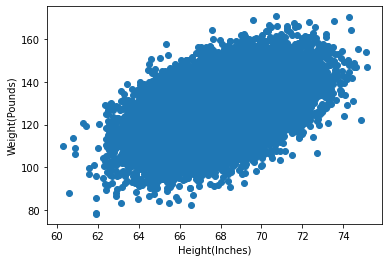

In [32]:
plt.scatter(x=df_original['Height(Inches)'], y=df_original['Weight(Pounds)'])
plt.xlabel('Height(Inches)')
plt.ylabel('Weight(Pounds)')
plt.show()

In [52]:
df = df_original.copy()
df['XY'] = df['Height(Inches)'] * df['Weight(Pounds)']
df['X2'] = df['Weight(Pounds)']**2

# total observations
n = df.shape[0]

# slope of the best fitting line
m = ( (n*df['XY'].sum()) - (df['Height(Inches)'].sum()*df['Weight(Pounds)'].sum()) ) / ( (n*((df['Height(Inches)']**2).sum())) - (df['Height(Inches)'].sum()**2) )

# y-intercept
c = (df['Weight(Pounds)'].sum() - (m*(df['Height(Inches)'].sum())))/n

print('observations: {}'.format(n))
print('slope: {}'.format(m))
print('intercept: {}'.format(c))

# Predict weights using heights and the linear equation
df['Prediction_1'] = (m * df['Height(Inches)']) + c

observations: 25000
slope: 3.0834764454016637
intercept: -82.57574306445234


In [53]:
# Check if feature scaling would give us a different slope and intercept

scaler = StandardScaler()
scaler.fit(df.loc[:,['Height(Inches)','Weight(Pounds)']])
df[['Height(Scaled)','Weight(Scaled)']] = scaler.transform(df.loc[:,['Height(Inches)','Weight(Pounds)']])

df['XY(Scaled)'] = df['Height(Scaled)'] * df['Weight(Scaled)']
df['X2(Scaled)'] = df['Height(Scaled)']**2

n = df.shape[0]
m = ( (n * (df['XY(Scaled)'].sum())) - (df['Height(Scaled)'].sum() * df['Weight(Scaled)'].sum()) ) / ( (n * (df['Height(Scaled)']**2).sum()) - (df['Height(Scaled)'].sum()**2) )
c = (df['Weight(Scaled)'].sum() - (m * (df['Height(Scaled)'].sum())) ) / n

print('observations: {}'.format(n))
print('slope: {}'.format(m))
print('intercept: {}'.format(c))

# Predict weights using heights and the linear equation
df['Prediction_2'] = (m * df['Height(Scaled)']) + c

# De-standardize the predictions
y_mean = df['Weight(Pounds)'].mean()
y_std = df['Weight(Pounds)'].std()

df['Prediction_2'] = (df['Prediction_2'] * y_std) + y_mean

# Though feature scaling is giving us different slope and intercept, predictions seems to be very much off from actual values
# De-standardizing the predicted numbers using mean and standard deviation of actual response variable is actual matching with the predictions made using original features before scaling

observations: 25000
slope: 0.5028585206028442
intercept: -4.4108025087401396e-15


In [54]:
df.head()

,Height(Inches),Weight(Pounds),XY,X2,Prediction_1,Height(Scaled),Weight(Scaled),XY(Scaled),X2(Scaled),Prediction_2
Index,,,,,,,,,,
1,65.78331,112.9925,7433.020655,12767.305056,120.265544,-1.162051,-1.208072,1.403841,1.350363,120.265408
2,71.51521,136.4873,9760.917922,18628.783061,137.939722,1.852136,0.806805,1.494312,3.430406,137.939940
3,69.39874,153.0269,10619.874046,23417.232124,131.413637,0.739165,2.225214,1.644801,0.546365,131.413724
4,68.21660,142.3354,9709.637048,20259.366093,127.768536,0.117523,1.308328,0.153759,0.013812,127.768550
5,67.78781,144.2971,9781.584398,20821.653068,126.446372,-0.107961,1.476561,-0.159411,0.011656,126.446360


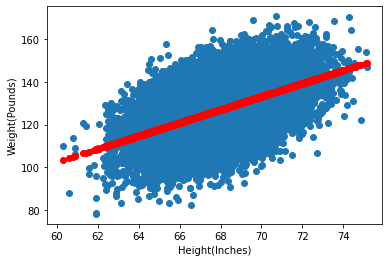

In [63]:
plt.scatter(x=df_original['Height(Inches)'], y=df_original['Weight(Pounds)'])
plt.xlabel('Height(Inches)')
plt.ylabel('Weight(Pounds)')
plt.scatter(x=df['Height(Inches)'], y=df['Prediction_1'], c='red')
# plt.scatter(x=df['Height(Inches)'], y=df['Prediction_2'], c='green')
plt.show()

Did not find any difference between before and after scaling.

In [75]:
# Calculate the cost using root mean squared error

rmse = np.sqrt(np.mean((df['Weight(Pounds)'] - df['Prediction_1'])**2))
print('RMSE: {}'.format(rmse))

RMSE: 10.079113675632804


In [78]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(df['Height(Inches)'].values.reshape(-1,1), df['Weight(Pounds)'])

m = linear_regression_model.coef_[0]
c = linear_regression_model.intercept_
print('slope: {}'.format(m))
print('y-intercept: {}'.format(c))

df['Prediction_3'] = m * df['Height(Inches)'] + c

rmse = np.sqrt(np.mean((df['Weight(Pounds)'] - df['Prediction_3'])**2))
print('RMSE: {}'.format(rmse))

slope: 3.0834764454029626
y-intercept: -82.57574306454065
RMSE: 10.079113675632804
